In [1]:
from analysis_utils import get_combined_data
usd_name = 'BUSD'
token_name='BTC'
symbol = token_name + usd_name

df = get_combined_data(symbol, 'ksol_0_0_0', 1646229060000, 1658229059999)

In [3]:
import pandas as pd
import numpy as np

# df[10000:].head(10)
buy_data = df[pd.isna(df['buy_price'].shift(1)) & (~pd.isna(df['buy_price']))].copy()
buy_data.head(10)

,open_time,open,high,low,close,volume,close_time,quote_assert_volume,number_of_trades,taker_buy_volume,taker_buy_quote_asset_volume,TR,last_top,step_after_top,last_bottom,step_after_bottom,is_up,cycle_step,buy_price,sell_price
354,1.646250e+12,43730.1,43772.1,43710.0,43760.0,10.325,1.646250e+12,4.516395e+05,405.0,5.683,2.486162e+05,62.1,43762.8,37.0,43437.4,17.0,1.0,20.0,43762.8,NaN
359,1.646251e+12,43744.7,43780.0,43744.7,43776.3,10.412,1.646251e+12,4.557064e+05,375.0,8.925,3.906232e+05,35.3,43762.8,42.0,43437.4,22.0,1.0,20.0,43762.8,NaN
403,1.646253e+12,43824.8,43865.6,43824.7,43834.3,15.102,1.646253e+12,6.621412e+05,430.0,9.728,4.265003e+05,40.9,43825.8,43.0,43687.6,34.0,1.0,9.0,43825.8,NaN
414,1.646254e+12,43808.1,43829.4,43801.7,43811.2,6.988,1.646254e+12,3.061894e+05,200.0,3.710,1.625565e+05,27.7,43825.8,54.0,43687.6,45.0,1.0,9.0,43825.8,NaN
418,1.646254e+12,43809.1,43867.4,43809.1,43845.1,14.728,1.646254e+12,6.456859e+05,408.0,7.605,3.334037e+05,58.3,43825.8,58.0,43687.6,49.0,1.0,9.0,43825.8,NaN
480,1.646258e+12,43875.9,43927.6,43866.9,43911.4,24.620,1.646258e+12,1.081087e+06,639.0,18.883,8.291689e+05,60.7,43884.2,31.0,43774.0,19.0,1.0,12.0,43884.2,NaN
909,1.646284e+12,43450.8,43500.0,43438.0,43479.9,25.983,1.646284e+12,1.129443e+06,583.0,16.935,7.360772e+05,62.0,43489.8,33.0,43278.9,12.0,1.0,21.0,43489.8,NaN
918,1.646284e+12,43464.0,43494.8,43457.6,43494.8,3.892,1.646284e+12,1.692126e+05,203.0,2.538,1.103420e+05,37.2,43489.8,42.0,43278.9,21.0,1.0,21.0,43489.8,NaN
1038,1.646291e+12,43518.4,43658.8,43518.0,43587.1,122.570,1.646291e+12,5.343722e+06,2087.0,81.973,3.573653e+06,140.8,43520.0,119.0,42894.6,55.0,1.0,64.0,43520.0,NaN
1103,1.646295e+12,43580.0,43604.4,43577.6,43604.4,13.507,1.646295e+12,5.887887e+05,361.0,8.122,3.540364e+05,26.8,43601.6,44.0,43366.0,18.0,1.0,26.0,43601.6,NaN


查看买之后的高点与当前价格差的分布

In [5]:
buy_data = df[pd.isna(df['buy_price'].shift(1)) & (~pd.isna(df['buy_price']))].copy()

next_top = np.nan
next_bottom = np.nan
curr_top = np.nan
curr_bottom = np.nan
def next_top_bottom(x):
    global next_top, next_bottom, curr_top, curr_bottom
    if x['last_top'] != curr_top:
        next_top = curr_top
        curr_top = x['last_top']

    if x['last_bottom'] != curr_bottom:
        next_bottom = curr_bottom
        curr_bottom = x['last_bottom']

    return next_top, next_bottom

buy_data[['next_top', 'next_bottom']] = buy_data.iloc[::-1].apply(
    lambda x: next_top_bottom(x), axis=1, result_type="expand").iloc[::-1]

Get the future info

In [8]:
last_sell_price = np.nan
last_buy_price = np.nan

next_top = np.nan
next_bottom = np.nan
curr_top = np.nan
curr_bottom = np.nan

def get_future_info(x):
    global last_sell_price, last_buy_price

    if not pd.isna(x['sell_price']):
        last_sell_price = x['sell_price']

    if not pd.isna(x['buy_price']):
        last_buy_price = x['buy_price']

    global next_top, next_bottom, curr_top, curr_bottom

    if x['last_top'] != curr_top:
        next_top = curr_top
        curr_top = x['last_top']

    if x['last_bottom'] != curr_bottom:
        next_bottom = curr_bottom
        curr_bottom = x['last_bottom']

    return last_buy_price, last_sell_price, max(x['high'], next_top), min(x['low'], next_bottom)

df[['target_buy_price', 'target_sell_price', 'next_top', 'next_bottom']] = df.iloc[::-1].apply(
    lambda x: get_future_info(x), axis=1, result_type="expand").iloc[::-1]

df.head()

,open_time,open,high,low,close,volume,close_time,quote_assert_volume,number_of_trades,taker_buy_volume,...,ATBQAV64,ATBQAV256,ACS4,ACS16,ACS64,ACS256,target_buy_price,target_sell_price,next_top,next_bottom
0,1.646229e+12,43540.7,43540.7,43512.5,43516.4,11.056,1.646229e+12,481250.0731,414.0,3.620,...,NaN,NaN,NaN,NaN,NaN,NaN,43762.8,44212.1,43540.7,43512.5
1,1.646229e+12,43516.3,43532.6,43501.0,43502.8,12.379,1.646229e+12,538668.5026,380.0,5.189,...,NaN,NaN,NaN,NaN,NaN,NaN,43762.8,44212.1,43532.6,43501.0
2,1.646229e+12,43502.5,43540.1,43487.5,43503.5,16.426,1.646229e+12,714832.4526,540.0,7.254,...,NaN,NaN,NaN,NaN,NaN,NaN,43762.8,44212.1,43540.1,43487.5
3,1.646229e+12,43503.5,43527.6,43494.4,43527.6,9.403,1.646229e+12,409096.2926,333.0,4.739,...,NaN,NaN,NaN,NaN,NaN,NaN,43762.8,44212.1,43527.6,43494.4
4,1.646229e+12,43529.0,43529.0,43460.1,43506.2,15.565,1.646229e+12,676800.0783,584.0,7.863,...,NaN,NaN,NaN,NaN,NaN,NaN,43762.8,44212.1,43529.0,43460.1


In [9]:
# Time of the saving earn is one step ahead the true buy/sell time
df['earn_if_buy'] = df['target_sell_price'].shift(-1) - df['buy_price']
df['earn_if_sell'] = df['sell_price'] - df['target_buy_price'].shift(-1)

In [10]:
df[['last_top', 'last_bottom', 'buy_price', 'sell_price', 'target_buy_price', 'target_sell_price', 'earn_if_buy', 'earn_if_sell', 'next_top', 'next_bottom']].head(30)

,last_top,last_bottom,buy_price,sell_price,target_buy_price,target_sell_price,earn_if_buy,earn_if_sell,next_top,next_bottom
0,NaN,NaN,NaN,NaN,43762.8,44212.1,NaN,NaN,43540.7,43512.5
1,NaN,NaN,NaN,NaN,43762.8,44212.1,NaN,NaN,43532.6,43501.0
2,NaN,NaN,NaN,NaN,43762.8,44212.1,NaN,NaN,43540.1,43487.5
3,NaN,NaN,NaN,NaN,43762.8,44212.1,NaN,NaN,43527.6,43494.4
4,NaN,NaN,NaN,NaN,43762.8,44212.1,NaN,NaN,43529.0,43460.1
5,NaN,NaN,NaN,NaN,43762.8,44212.1,NaN,NaN,43517.5,43472.3
6,NaN,NaN,NaN,NaN,43762.8,44212.1,NaN,NaN,43489.9,43461.7
7,NaN,NaN,NaN,NaN,43762.8,44212.1,NaN,NaN,43490.0,43443.1
8,NaN,NaN,NaN,NaN,43762.8,44212.1,NaN,NaN,43590.0,43439.9
9,NaN,NaN,NaN,NaN,43762.8,44212.1,NaN,NaN,43611.7,43517.9


In [11]:
buy_data = df[pd.isna(df['buy_price'].shift(1)) & (~pd.isna(df['buy_price']))].copy()
buy_data.drop(['open_time', 'close_time', 'volume', 'quote_assert_volume', 'number_of_trades', 'taker_buy_quote_asset_volume',
    'taker_buy_volume', 'sell_price', 'target_buy_price', 'earn_if_sell'], axis=1, inplace=True)
buy_data['earn_if_buy'] = buy_data['earn_if_buy'] / buy_data['buy_price']
buy_data['height'] = buy_data['last_top'] - buy_data['last_bottom']
buy_data['delta_top'] = buy_data['next_top'] - buy_data['buy_price']
buy_data['delta_top_percentage'] = buy_data['delta_top'] / buy_data['buy_price']
buy_data['delta_of_height'] = buy_data['delta_top'] / buy_data['height']

# np.mean(buy_data['earn_if_buy'])
# np.mean(buy_data['next_top'])
buy_data.head(30)

,open,high,low,close,TR,last_top,step_after_top,last_bottom,step_after_bottom,is_up,...,ACS64,ACS256,target_sell_price,next_top,next_bottom,earn_if_buy,height,delta_top,delta_top_percentage,delta_of_height
354,43730.1,43772.1,43710.0,43760.0,62.1,43762.8,37.0,43437.4,17.0,1.0,...,52.687500,19.992188,43887.0,43825.8,43687.6,0.002838,325.4,63.0,0.001440,0.193608
359,43744.7,43780.0,43744.7,43776.3,35.3,43762.8,42.0,43437.4,22.0,1.0,...,53.703125,20.054688,43887.0,43825.8,43687.6,0.002838,325.4,63.0,0.001440,0.193608
403,43824.8,43865.6,43824.7,43834.3,40.9,43825.8,43.0,43687.6,34.0,1.0,...,14.921875,20.121094,43887.0,43898.6,43760.5,0.001396,138.2,72.8,0.001661,0.526773
414,43808.1,43829.4,43801.7,43811.2,27.7,43825.8,54.0,43687.6,45.0,1.0,...,13.031250,19.679688,43887.0,43898.6,43760.5,0.001396,138.2,72.8,0.001661,0.526773
418,43809.1,43867.4,43809.1,43845.1,58.3,43825.8,58.0,43687.6,49.0,1.0,...,12.343750,19.757812,43887.0,43898.6,43760.5,0.001396,138.2,72.8,0.001661,0.526773
480,43875.9,43927.6,43866.9,43911.4,60.7,43884.2,31.0,43774.0,19.0,1.0,...,23.578125,23.886719,43887.0,44360.0,43866.9,0.000064,110.2,475.8,0.010842,4.317604
909,43450.8,43500.0,43438.0,43479.9,62.0,43489.8,33.0,43278.9,12.0,1.0,...,38.390625,36.683594,43278.9,43520.0,42894.6,-0.004849,210.9,30.2,0.000694,0.143196
918,43464.0,43494.8,43457.6,43494.8,37.2,43489.8,42.0,43278.9,21.0,1.0,...,35.437500,34.398438,43278.9,43520.0,42894.6,-0.004849,210.9,30.2,0.000694,0.143196
1038,43518.4,43658.8,43518.0,43587.1,140.8,43520.0,119.0,42894.6,55.0,1.0,...,56.781250,38.777344,43390.0,43707.8,43390.0,-0.002987,625.4,187.8,0.004315,0.300288
1103,43580.0,43604.4,43577.6,43604.4,26.8,43601.6,44.0,43366.0,18.0,1.0,...,21.875000,34.722656,43366.0,43632.1,43280.0,-0.005403,235.6,30.5,0.000700,0.129457


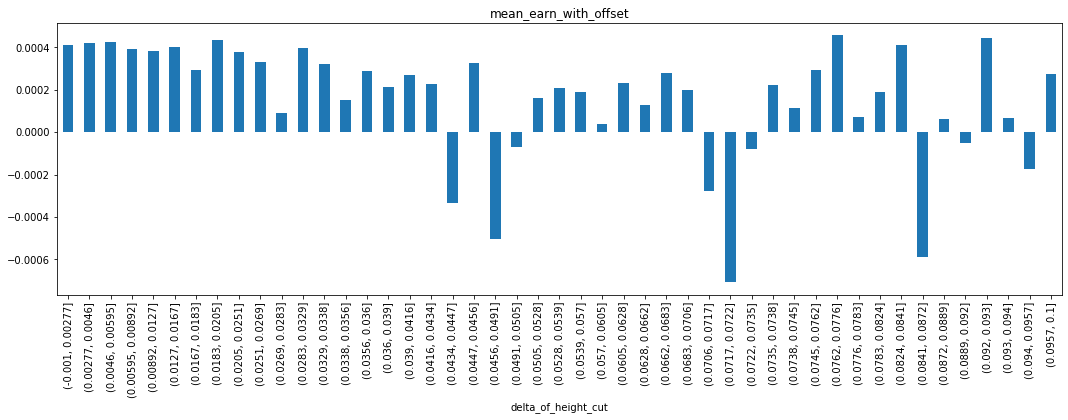

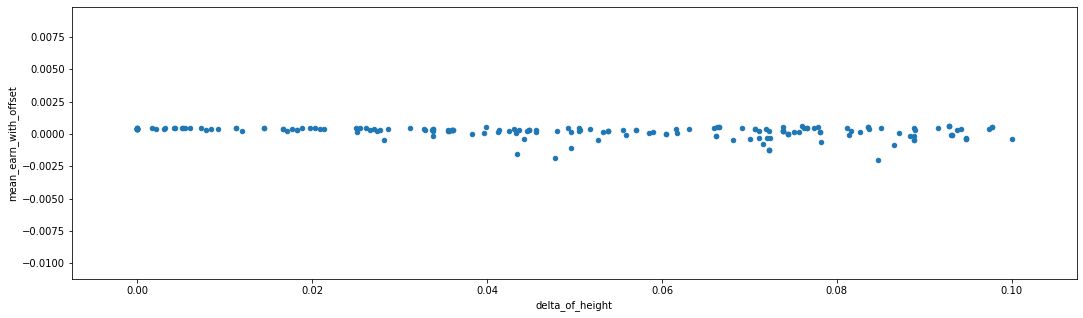

In [12]:
import matplotlib.pyplot as plt

def plt_A_B(df_data, idx_A, idx_B, bias):
    plt.figure(figsize=(18,5))
    (df_data.groupby(idx_A)[idx_B].mean() - bias).plot.bar()
    plt.title(idx_B)
    plt.show()

def plt_point_A_B(df_data, idx_A, idx_B):
    df_data.plot(kind='scatter', x=idx_A, y=idx_B, figsize=(18,5))

# x_name = 'delta_top_percentage'
x_name = 'delta_of_height'
plot_data = buy_data[['delta_of_height', 'delta_top_percentage', 'earn_if_buy']].copy()

plot_data = plot_data.sort_values(by=[x_name], ascending=False, na_position='first').reset_index(drop=True)
plot_data['cum_earn'] = plot_data['earn_if_buy'].cumsum()

def get_mean_earn(x):
    num = int(x.name) + 1
    mean_earn = x['cum_earn'] / num
    mean_earn_with_offset = mean_earn - x['delta_top_percentage']
    return mean_earn, mean_earn_with_offset

plot_data[['mean_earn', 'mean_earn_with_offset']] = plot_data.apply(lambda x: get_mean_earn(x), axis=1, result_type="expand")
# plot_data = plot_data[plot_data[x_name] < 0.003]
plot_data = plot_data[plot_data[x_name] < 0.1]
plot_data[x_name + '_cut'] = pd.qcut(plot_data[x_name], 50, duplicates='drop')
plt_A_B(plot_data, x_name + '_cut', 'mean_earn_with_offset', 0)
plt_point_A_B(plot_data, x_name, 'mean_earn_with_offset')
# plot_data.head(30)